In [9]:
from qiskit import IBMQ, QuantumCircuit
import qiskit
import numpy as np

In [2]:
# IBMQの認証情報をロード
provider = IBMQ.load_account()

In [3]:
"""実機ハードウェアのネイティブゲートを確認する
qiskitで記述した各ゲートは、ハードウェア上で実行可能なネイティブゲートにトランスパイルされる
"""
backend = provider.get_backend("ibmq_5_yorktown")
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

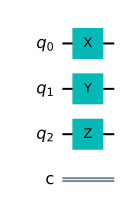

In [7]:
"""トランスパイラによる変換を確認する(1)
まずは適当に量子回路を作成する
"""
qc = QuantumCircuit(3, 1)

qc.x(0)
qc.y(1)
qc.z(2)

qc.draw("mpl")

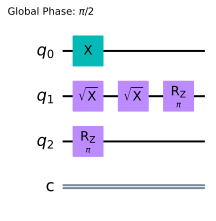

In [13]:
"""トランスパイラによる変換を確認する(2)
上記量子回路を、実機ibmq_5_yorktownのネイティブゲートに変換したときの量子回路を描画する
"""
qc2 = qiskit.compiler.transpile(qc, basis_gates=backend.configuration().basis_gates)

qc2.draw("mpl")

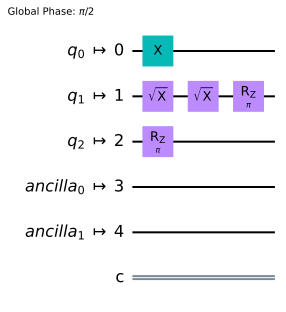

In [14]:
"""backendを指定してもOK
ibmq_5_yorktownは5量子ビットを持つので、未使用の量子ビットも描画される
"""
qc3 = qiskit.compiler.transpile(qc, backend=backend)

qc3.draw("mpl")

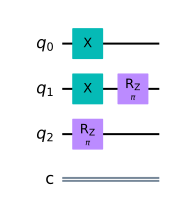

In [15]:
"""トランスパイル後の量子回路はなるべくゲート数が少ないことが望ましい
トランスパイラが常に最適な返還をシてくれるとは限らない（それはそう）

たとえば同じゲートセットを用いて、上記の量子回路とグローバル位相を除き等価な、量子ゲート数のより少ない量子回路を作ることができる。
"""
qc = QuantumCircuit(3, 1)

qc.x(0)
qc.x(1)
qc.rz(np.pi, 1)
qc.rz(np.pi, 2)

qc.draw()

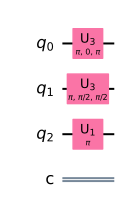

In [17]:
"""他のゲートセットによる変換
"""
qc = QuantumCircuit(3, 1)

qc.x(0)
qc.y(1)
qc.z(2)

# 基本ゲートのゲートセットをu1, u2, u3にする
qc2 = qiskit.compiler.transpile(qc, basis_gates=["id", "u1", "u2", "u3", "cx"])

qc2.draw()